In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open("services.json") as f:   
    data = json.load(f)

In [3]:
data

{'nodes': [{'id': '834582e3e000f626b26a7141a0ae36d8920c3c73abcd9484196cc342d89de880',
   'title': 'DataLake',
   'data': {'id': '834582e3e000f626b26a7141a0ae36d8920c3c73abcd9484196cc342d89de880',
    'name': 'DataLake',
    'level': 5},
   'label': 'DataLake',
   'x': 27,
   'y': 5},
  {'id': '7c74a2ad7ce120509f868fbdf5ad2438c57795b7fd4f3fd45774ef06cdaaa985',
   'title': 'VIS',
   'data': {'id': '7c74a2ad7ce120509f868fbdf5ad2438c57795b7fd4f3fd45774ef06cdaaa985',
    'name': 'VIS',
    'level': 5},
   'label': 'VIS',
   'x': 26,
   'y': 5},
  {'id': '60aab2cbca6471089c918de107872838f28f3047f461dbc792a9f1928a5934cc',
   'title': 'CTS',
   'data': {'id': '60aab2cbca6471089c918de107872838f28f3047f461dbc792a9f1928a5934cc',
    'name': 'CTS',
    'level': 3},
   'label': 'CTS',
   'x': 17,
   'y': 3},
  {'id': 'aef7de28d52977f1b5cd0fecfdc151717610adf41e0aa33b4d9f7522a43337ef',
   'title': 'Server',
   'data': {'id': 'aef7de28d52977f1b5cd0fecfdc151717610adf41e0aa33b4d9f7522a43337ef',
    'nam

In [4]:
service_dict = {}
rvs_service_dict = {}
indx = 0
nodes = data['nodes']
for node in nodes:
    id = node['id']
    service_dict[id] = indx
    rvs_service_dict[indx] = id
    indx+=1  

In [5]:
service_dict

{'834582e3e000f626b26a7141a0ae36d8920c3c73abcd9484196cc342d89de880': 0,
 '7c74a2ad7ce120509f868fbdf5ad2438c57795b7fd4f3fd45774ef06cdaaa985': 1,
 '60aab2cbca6471089c918de107872838f28f3047f461dbc792a9f1928a5934cc': 2,
 'aef7de28d52977f1b5cd0fecfdc151717610adf41e0aa33b4d9f7522a43337ef': 3,
 'b3d1b21247f19072a7fe8ceec1f9cc88ff5749eb5a6314a287214fcfbbd712df': 4,
 '39e7b6e12e604a9e2f368dc5bc23f21bf7714e0eba67cccb2bfb691a528769c9': 5,
 '36b18e7d010096e31b5e45d2b399e8b334608f3c95e676022028130492211e3d': 6,
 '5543b4d35c31e4d7b185c65ed37f73b29460202b7246d7f50aec9c15aa0d8ba6': 7,
 'f741a5cac602404ade99cc307b0c296ffb010486daaebfc508ac7ee3915cc3e2': 8,
 '03af9a34cdf1672cce591c719770824cf4fd21c4f2369460301065ac834e0035': 9,
 '7ba987a0acce7efe675e58687211850c8ffb440f3b63522b39f138ee993d48a7': 10,
 'b5d43bc3d4b39bf04df1366be940f3d5bb7a2ff87732ef99b4e917f8ebf21dd7': 11,
 'd537c888e1c0667c26c1b10f724418e3b4a0af8f0f1ade0a33ca8c119e8d48cd': 12,
 'ec7f45e963a21a870358d0dd7c9876bae8b02e4c042b34f82d76b131a4c

In [6]:
indx - 1

240

In [7]:
data.keys()

dict_keys(['nodes', 'edges', 'disorderPercent'])

In [8]:
data['edges'][0]

{'id': 'a3b0e17ad5a0edbb8c45186d84307f74781fd95885cf4099a0898d79801766a7',
 'from': '685e298e59bfaf200a928ede376e1fdf5db1005b2ec822544f3ffc222dcde62d',
 'to': '76dc774a66c9a39f69d74a86f3aa977249426a180152f82920a683783ae91bd4',
 'data': {'id': 'a3b0e17ad5a0edbb8c45186d84307f74781fd95885cf4099a0898d79801766a7',
  'isOrdered': True,
  'isFixed': False,
  'isPartOfACycle': False}}

In [9]:
dsm = np.zeros((indx,indx))

In [10]:
dsm

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
for edge in data['edges']:
    x = service_dict[edge['from']]
    y = service_dict[edge['to']]
    dsm[x,y] = 1

In [12]:
def switch_tasks(dsm, a, b):
    d1 = dsm[[a,b],:]
    d2 = dsm[:,[a,b]]

    dsm[[a,b],:] = d1[[1,0],:]
    dsm[:,[a,b]] = d2[:,[1,0]]
    

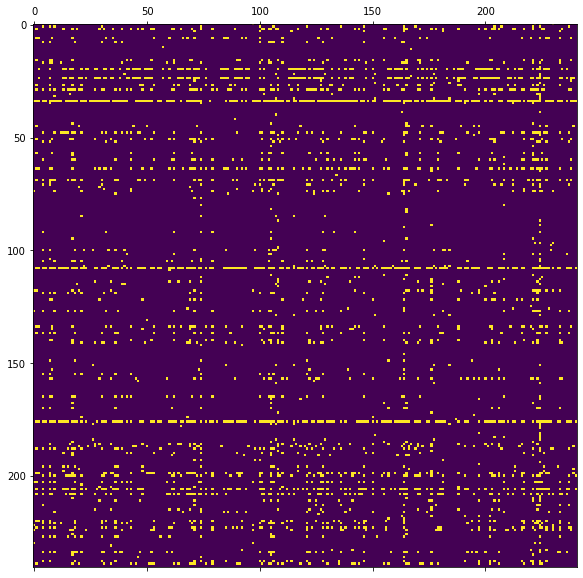

In [13]:
fig, ax = plt.subplots(figsize=(10,10))
ax.matshow(dsm.transpose())

In [14]:
output_sum = np.sum(dsm, axis=0)
input_sum = np.sum(dsm, axis=1)

In [15]:
zero_input = np.where(input_sum == 0)
zero_input

(array([  3,   6,  54,  58,  67,  75,  77,  80,  82,  96, 111, 149, 153,
        168, 173, 185, 193, 218, 231, 235]),)

In [16]:
zero_output = np.where(output_sum == 0)
zero_output

(array([  4,   5,   7,   9,  12,  13,  14,  15,  18,  21,  28,  30,  36,
         37,  38,  41,  43,  46,  47,  50,  53,  55,  56,  61,  63,  66,
         68,  76,  78,  79,  81,  84,  86,  88,  91,  93,  94, 101, 103,
        106, 110, 117, 120, 121, 123, 124, 128, 130, 132, 133, 136, 138,
        139, 143, 144, 145, 147, 148, 150, 152, 154, 156, 160, 161, 162,
        163, 164, 167, 169, 171, 180, 192, 201, 202, 207, 212, 225, 228,
        229, 232, 237, 240]),)

In [17]:
# client services
client_services = []
for node in np.array(nodes)[zero_input]:
    client_services.append(node['id'])
client_services[:2]

['aef7de28d52977f1b5cd0fecfdc151717610adf41e0aa33b4d9f7522a43337ef',
 '36b18e7d010096e31b5e45d2b399e8b334608f3c95e676022028130492211e3d']

In [18]:
# core services
core_services = []
for node in np.array(nodes)[zero_output]:
    core_services.append(node['label'])
core_services[:2]

['AppCube', 'AgileDevOpsExpertServices']

In [19]:
dsm1 = np.zeros((indx,indx))
dsm1[10,100] = 1
dsm1[50,100] = 1
dsm1[20,11] = 1


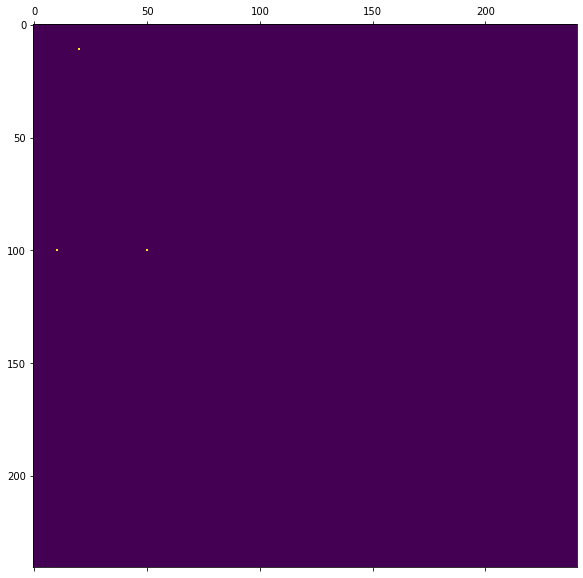

In [20]:
fig, ax = plt.subplots(figsize=(10,10))
ax.matshow(dsm1.transpose())

In [21]:
a = 5 
b = 1
switch_tasks(dsm1, a, b)
